In [1]:
import numpy as np
import pandas as pd

from algorithm.util.directed_graph import DirectedGraph
from algorithm.util.read_pairs_data import read_pairs_data
from algorithm.util.graph_vis import GraphVisualization
from algorithm.greedy_n_way_exchange import GreedyNWayExchange

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import time

In [2]:
pairs_filename = "data/100/100_15_pairs.txt"

In [3]:
pairs = read_pairs_data(pairs_filename)
pairs.head()

,pair_num,donor_bloodtype,recipient_bloodtype,pra
0,P1500,O,O,90
1,P1501,O,O,90
2,P1502,A,O,5
3,P1503,B,-,-1
4,P1504,O,O,90


In [4]:
grph = DirectedGraph(pairs)

In [5]:
grph.adjacency

{'P1500': ['P1501',
  'P1502',
  'P1504',
  'P1505',
  'P1506',
  'P1507',
  'P1508',
  'P1509',
  'P1510',
  'P1511',
  'P1512',
  'P1513',
  'P1514',
  'P1515',
  'P1516',
  'P1517',
  'P1518',
  'P1519',
  'P1520',
  'P1521',
  'P1522',
  'P1523',
  'P1525',
  'P1526',
  'P1527',
  'P1528',
  'P1529',
  'P1530',
  'P1531',
  'P1532',
  'P1533',
  'P1534',
  'P1535',
  'P1536',
  'P1537',
  'P1538',
  'P1539',
  'P1540',
  'P1541',
  'P1542',
  'P1543',
  'P1544',
  'P1545',
  'P1546',
  'P1547',
  'P1548',
  'P1549',
  'P1550',
  'P1551',
  'P1552',
  'P1553',
  'P1554',
  'P1555',
  'P1556',
  'P1557',
  'P1558',
  'P1559',
  'P1560',
  'P1561',
  'P1562',
  'P1563',
  'P1564',
  'P1565',
  'P1566',
  'P1567',
  'P1568',
  'P1569',
  'P1570',
  'P1571',
  'P1573',
  'P1574',
  'P1575',
  'P1576',
  'P1577',
  'P1578',
  'P1579',
  'P1580',
  'P1581',
  'P1582',
  'P1583',
  'P1584',
  'P1585',
  'P1586',
  'P1587',
  'P1589',
  'P1590',
  'P1591',
  'P1592',
  'P1593',
  'P1594',
 

In [6]:
len(grph.get_edges())

3752

In [7]:
gv = GraphVisualization()

gv.add_edges_from(grph.get_edges())

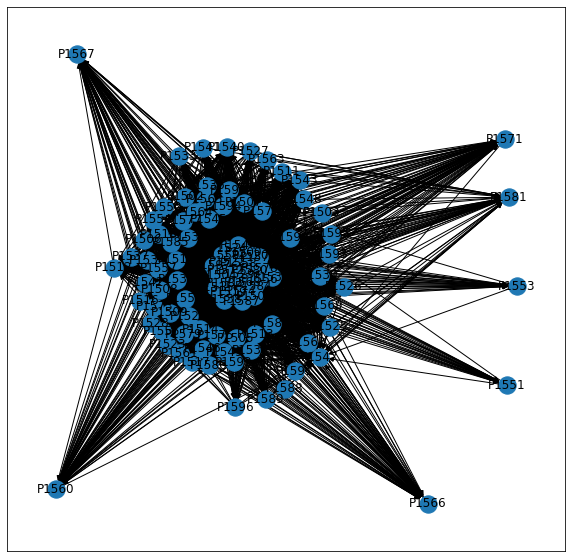

In [8]:
plt.figure(figsize=(10, 10))
gv.visualize()

In [9]:
a = time.time()
cycles = grph.get_cycles()
b = time.time() - a
print(b, "s")

0.009957313537597656 s


In [10]:
cycles

[['P1500', 'P1501'],
 ['P1500', 'P1501', 'P1502', 'P1514', 'P1520'],
 ['P1501', 'P1502', 'P1514', 'P1520'],
 ['P1502', 'P1514', 'P1520'],
 ['P1500', 'P1501', 'P1502', 'P1514', 'P1520', 'P1504'],
 ['P1501', 'P1502', 'P1514', 'P1520', 'P1504'],
 ['P1502', 'P1514', 'P1520', 'P1504'],
 ['P1514', 'P1520', 'P1504', 'P1505'],
 ['P1520', 'P1504', 'P1505'],
 ['P1505', 'P1525'],
 ['P1514', 'P1520', 'P1504', 'P1505', 'P1525', 'P1506'],
 ['P1520', 'P1504', 'P1505', 'P1525', 'P1506'],
 ['P1525', 'P1506'],
 ['P1505', 'P1525', 'P1506', 'P1526'],
 ['P1506', 'P1526'],
 ['P1514', 'P1520', 'P1504', 'P1505', 'P1525', 'P1506', 'P1526', 'P1508'],
 ['P1520', 'P1504', 'P1505', 'P1525', 'P1506', 'P1526', 'P1508'],
 ['P1525', 'P1506', 'P1526', 'P1508'],
 ['P1526', 'P1508'],
 ['P1500',
  'P1501',
  'P1502',
  'P1514',
  'P1520',
  'P1504',
  'P1505',
  'P1525',
  'P1506',
  'P1526',
  'P1508',
  'P1538'],
 ['P1501',
  'P1502',
  'P1514',
  'P1520',
  'P1504',
  'P1505',
  'P1525',
  'P1506',
  'P1526',
  'P1508'

In [18]:
gnway = GreedyNWayExchange(5, 'maximum')

In [19]:
a = time.time()
gnway.finalize_exchange(grph)
b = time.time() - a
print(b, "s")

0.000997781753540039 s


In [20]:
def display_all(list_of_pairs):
    for p in list_of_pairs:
        display(pairs[pairs['pair_num'] == p])

In [21]:
flatten = lambda t: [item for sublist in t for item in sublist]
display_all([i for i in grph.medical_data['pair_num'] if (i not in flatten(gnway.cycles))])

,pair_num,donor_bloodtype,recipient_bloodtype,pra
3,P1503,B,-,-1


,pair_num,donor_bloodtype,recipient_bloodtype,pra
4,P1504,O,O,90


,pair_num,donor_bloodtype,recipient_bloodtype,pra
8,P1508,A,B,5


,pair_num,donor_bloodtype,recipient_bloodtype,pra
18,P1518,A,O,5


,pair_num,donor_bloodtype,recipient_bloodtype,pra
21,P1521,A,O,5


,pair_num,donor_bloodtype,recipient_bloodtype,pra
23,P1523,A,O,10


,pair_num,donor_bloodtype,recipient_bloodtype,pra
24,P1524,O,-,-1


,pair_num,donor_bloodtype,recipient_bloodtype,pra
30,P1530,B,O,90


,pair_num,donor_bloodtype,recipient_bloodtype,pra
32,P1532,A,O,5


,pair_num,donor_bloodtype,recipient_bloodtype,pra
33,P1533,B,O,5


,pair_num,donor_bloodtype,recipient_bloodtype,pra
34,P1534,A,O,28


,pair_num,donor_bloodtype,recipient_bloodtype,pra
36,P1536,A,B,28


,pair_num,donor_bloodtype,recipient_bloodtype,pra
37,P1537,A,O,90


,pair_num,donor_bloodtype,recipient_bloodtype,pra
41,P1541,B,O,10


,pair_num,donor_bloodtype,recipient_bloodtype,pra
42,P1542,A,O,28


,pair_num,donor_bloodtype,recipient_bloodtype,pra
48,P1548,B,O,5


,pair_num,donor_bloodtype,recipient_bloodtype,pra
49,P1549,A,B,5


,pair_num,donor_bloodtype,recipient_bloodtype,pra
50,P1550,A,O,28


,pair_num,donor_bloodtype,recipient_bloodtype,pra
51,P1551,AB,O,32


,pair_num,donor_bloodtype,recipient_bloodtype,pra
52,P1552,A,O,5


,pair_num,donor_bloodtype,recipient_bloodtype,pra
53,P1553,AB,O,10


,pair_num,donor_bloodtype,recipient_bloodtype,pra
54,P1554,A,O,5


,pair_num,donor_bloodtype,recipient_bloodtype,pra
55,P1555,A,O,10


,pair_num,donor_bloodtype,recipient_bloodtype,pra
61,P1561,A,O,10


,pair_num,donor_bloodtype,recipient_bloodtype,pra
62,P1562,B,O,5


,pair_num,donor_bloodtype,recipient_bloodtype,pra
63,P1563,B,O,28


,pair_num,donor_bloodtype,recipient_bloodtype,pra
64,P1564,A,B,10


,pair_num,donor_bloodtype,recipient_bloodtype,pra
66,P1566,AB,A,5


,pair_num,donor_bloodtype,recipient_bloodtype,pra
67,P1567,AB,A,10


,pair_num,donor_bloodtype,recipient_bloodtype,pra
69,P1569,B,O,10


,pair_num,donor_bloodtype,recipient_bloodtype,pra
71,P1571,AB,A,5


,pair_num,donor_bloodtype,recipient_bloodtype,pra
72,P1572,O,-,-1


,pair_num,donor_bloodtype,recipient_bloodtype,pra
73,P1573,A,O,28


,pair_num,donor_bloodtype,recipient_bloodtype,pra
75,P1575,A,O,10


,pair_num,donor_bloodtype,recipient_bloodtype,pra
77,P1577,A,O,5


,pair_num,donor_bloodtype,recipient_bloodtype,pra
79,P1579,A,O,10


,pair_num,donor_bloodtype,recipient_bloodtype,pra
81,P1581,AB,B,28


,pair_num,donor_bloodtype,recipient_bloodtype,pra
83,P1583,A,O,5


,pair_num,donor_bloodtype,recipient_bloodtype,pra
86,P1586,A,O,5


,pair_num,donor_bloodtype,recipient_bloodtype,pra
88,P1588,B,-,-1


,pair_num,donor_bloodtype,recipient_bloodtype,pra
89,P1589,B,O,10


,pair_num,donor_bloodtype,recipient_bloodtype,pra
90,P1590,A,O,5


,pair_num,donor_bloodtype,recipient_bloodtype,pra
91,P1591,B,O,5


,pair_num,donor_bloodtype,recipient_bloodtype,pra
92,P1592,A,O,5


,pair_num,donor_bloodtype,recipient_bloodtype,pra
93,P1593,B,O,5


,pair_num,donor_bloodtype,recipient_bloodtype,pra
94,P1594,A,O,10


,pair_num,donor_bloodtype,recipient_bloodtype,pra
95,P1595,B,O,5


,pair_num,donor_bloodtype,recipient_bloodtype,pra
96,P1596,B,O,10


,pair_num,donor_bloodtype,recipient_bloodtype,pra
97,P1597,O,-,-1


,pair_num,donor_bloodtype,recipient_bloodtype,pra
98,P1598,A,B,90


In [22]:
gnway.show_donation_mapping('text')

P1500 --> P1501
P1502 --> P1514 --> P1520
P1505 --> P1525
P1506 --> P1526
P1538 --> P1507
P1539 --> P1540 --> P1512
P1543 --> P1517
P1544 --> P1509
P1545 --> P1546
P1547 --> P1528
P1556 --> P1510
P1557 --> P1559 --> P1511 --> P1535
P1560 --> P1576
P1565 --> P1582 --> P1513
P1585 --> P1587 --> P1515 --> P1516
P1519 --> P1522
P1527 --> P1574
P1529 --> P1531
P1558 --> P1568
P1570 --> P1578
P1580 --> P1584


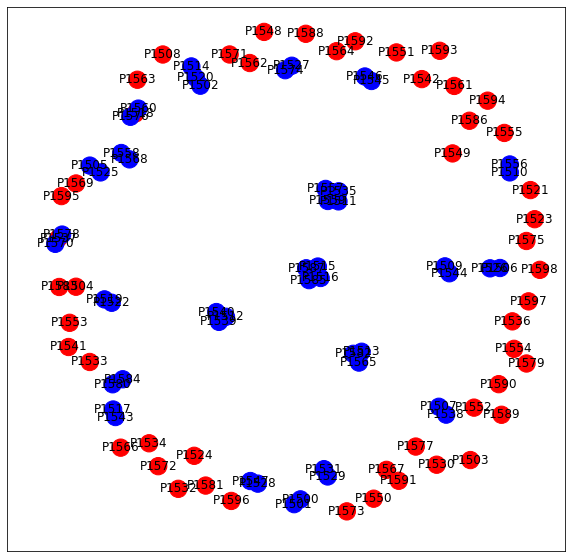

In [23]:
plt.figure(figsize=(10, 10))
gnway.show_donation_mapping('graph')

In [24]:
gnway.get_num_of_matched_pairs()    

49